In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

/Users/harshel/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
FUUR1 = pd.read_csv("../datasets/cell_lines/FUUR1_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
STFE = pd.read_csv("../datasets/cell_lines/STFE_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
UOK109 = pd.read_csv("../datasets/cell_lines/UOK109_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
UOK146 = pd.read_csv("../datasets/cell_lines/UOK146_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)

In [3]:
FUUR1

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
HSPA5,4,1.299300e-10,2.366200e-07,0.000261,1,4,-3.83120,1.000000e+00,1.000000e+00,1.000000,20922,0,-3.83120
RPS16,4,4.282000e-10,2.366200e-07,0.000261,2,4,-3.45840,1.000000e+00,1.000000e+00,1.000000,20838,0,-3.45840
FAU,4,1.578800e-09,2.366200e-07,0.000261,3,4,-3.37700,1.000000e+00,1.000000e+00,1.000000,20921,0,-3.37700
RPL7,4,2.992800e-09,2.366200e-07,0.000261,4,4,-2.76380,1.000000e+00,1.000000e+00,1.000000,20920,0,-2.76380
LUC7L3,4,6.144200e-09,2.366200e-07,0.000261,5,4,-3.01840,1.000000e+00,1.000000e+00,1.000000,20919,0,-3.01840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMSB4Y,4,9.999400e-01,9.999400e-01,1.000000,20918,0,0.81519,5.581400e-05,2.122500e-04,0.354125,10,4,0.81519
VSX1,4,9.999600e-01,9.999500e-01,1.000000,20919,0,0.81552,4.423900e-05,1.672900e-04,0.350000,8,4,0.81552
POTENTIALLY_ACTIVE_129,1,9.999800e-01,9.999800e-01,1.000000,20920,0,1.90410,1.951500e-05,1.774600e-05,0.123762,4,1,1.90410


In [4]:
STFE

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
TBC1D3,20,8.991000e-13,2.374000e-07,0.000101,1,20,-3.6440,1.000000e+00,1.000000e+00,1.000000,20853,0,-3.6440
HSPA5,4,1.534000e-10,2.374000e-07,0.000101,2,4,-5.6956,1.000000e+00,1.000000e+00,1.000000,20852,0,-5.6956
RPL19,4,2.875100e-10,2.374000e-07,0.000101,3,4,-4.5628,1.000000e+00,1.000000e+00,1.000000,20851,0,-4.5628
DCAF7,4,1.201200e-09,2.374000e-07,0.000101,4,4,-2.6034,1.000000e+00,1.000000e+00,1.000000,20850,0,-2.6034
HMGCS1,4,2.201600e-09,2.374000e-07,0.000101,5,4,-6.6864,1.000000e+00,1.000000e+00,1.000000,20849,0,-6.6864
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAF5L,4,1.000000e+00,1.000000e+00,1.000000,20849,0,1.5826,1.155300e-08,2.374000e-07,0.000619,6,4,1.5826
ATXN7,4,1.000000e+00,1.000000e+00,1.000000,20850,0,1.5164,1.133900e-09,2.374000e-07,0.000619,4,4,1.5164
MED12,3,1.000000e+00,1.000000e+00,1.000000,20851,0,1.2245,1.025100e-09,2.374000e-07,0.000619,3,3,1.2245


In [5]:
UOK109

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
HSPA5,4,6.294800e-11,2.366200e-07,0.000225,1,4,-5.0997,1.000000e+00,1.000000e+00,1.000000,20922,0,-5.0997
RPL19,4,5.002300e-10,2.366200e-07,0.000225,2,4,-4.2779,1.000000e+00,1.000000e+00,1.000000,20921,0,-4.2779
FAU,4,2.631400e-09,2.366200e-07,0.000225,3,4,-5.2782,1.000000e+00,1.000000e+00,1.000000,20920,0,-5.2782
CTR9,4,3.056500e-09,2.366200e-07,0.000225,4,4,-3.5458,1.000000e+00,1.000000e+00,1.000000,20919,0,-3.5458
ANAPC11,4,3.099500e-09,2.366200e-07,0.000225,5,4,-4.4206,1.000000e+00,1.000000e+00,1.000000,20918,0,-4.4206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPHA2,4,1.000000e+00,1.000000e+00,1.000000,20918,0,1.3068,3.474800e-07,1.183100e-06,0.004950,5,4,1.3068
CDKN1A,4,1.000000e+00,1.000000e+00,1.000000,20919,0,1.3375,2.280100e-08,2.366200e-07,0.001238,4,4,1.3375
ATG3,4,1.000000e+00,1.000000e+00,1.000000,20920,0,1.2043,9.138400e-09,2.366200e-07,0.001238,3,4,1.2043


In [6]:
UOK146

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
TBC1D3G,7,7.028800e-10,2.366200e-07,0.000206,1,7,-4.2388,1.000000e+00,1.000000e+00,1.000000,20922,0,-4.2388
PSMG3,4,2.356100e-09,2.366200e-07,0.000206,2,4,-6.0975,1.000000e+00,1.000000e+00,1.000000,20921,0,-6.0975
YRDC,4,6.036600e-09,2.366200e-07,0.000206,3,4,-6.5375,1.000000e+00,1.000000e+00,1.000000,20920,0,-6.5375
PSMA7,4,6.363800e-09,2.366200e-07,0.000206,4,4,-5.8654,1.000000e+00,1.000000e+00,1.000000,20919,0,-5.8654
CCT6A,4,9.634600e-09,2.366200e-07,0.000206,5,4,-6.5156,1.000000e+00,1.000000e+00,1.000000,20918,0,-6.5156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SV2B,4,9.999500e-01,9.999500e-01,0.999999,20918,0,2.0485,4.733800e-05,1.810100e-04,0.315594,10,4,2.0485
ZNF19,3,9.999700e-01,9.999800e-01,0.999999,20919,0,2.6913,3.256500e-05,1.010400e-04,0.265470,7,3,2.6913
FOXO3,4,9.999800e-01,9.999800e-01,0.999999,20920,0,2.4706,1.712500e-05,6.601600e-05,0.265470,4,4,2.4706


In [25]:
def scale(column):
    column_mean = column.mean()
    column_std = column.std()
    return (column - column_mean) / column_std

neg_scaled_df = pd.concat([
    scale(FUUR1["neg|score"]),
    scale(STFE["neg|score"]),
    scale(UOK109["neg|score"]),
    scale(UOK146["neg|score"])
], axis=1)

neg_mean_df = pd.DataFrame({"mean_neg_score": neg_scaled_df.mean(axis=1)})

neg_mean_df.insert(0, 'gene_name', neg_mean_df.index)
neg_mean_df.reset_index(drop=True, inplace=True)

# neg_mean_df.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']
# neg_mean_df['mean_neg_score'] = neg_mean_df.mean(axis=1)

neg_mean_df["mean_neg_score"] = np.log10(-neg_mean_df["mean_neg_score"])

# pos_mean_df = pd.concat([
#     FUUR1.sort_values("pos|score")["pos|score"], 
#     STFE.sort_values("pos|score")["pos|score"], 
#     UOK109.sort_values("pos|score")["pos|score"], 
#     UOK146.sort_values("pos|score")["pos|score"]
#     ], axis=1)

# pos_mean_df.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']
# pos_mean_df['mean_pos_score'] = pos_mean_df.mean(axis=1)

# pos_mean_df = -np.log10(pos_mean_df.sort_values("mean_pos_score", ascending=True))

print(neg_mean_df) # Higher mean score means more negatively selective genes (genes confer cell death)
# print(pos_mean_df) # Higher mean score means more positively selective genes (genes confer cell proliferation)

          gene_name  mean_neg_score
0             HSPA5        0.190823
1             RPS16        0.190823
2               FAU        0.190799
3              RPL7        0.190815
4            LUC7L3        0.190730
...             ...             ...
21141   NO_SITE_269             NaN
21142   NO_SITE_893             NaN
21143  LOC107985991             NaN
21144  LOC124904743             NaN
21145  LOC105378918             NaN

[21146 rows x 2 columns]


/Users/harshel/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
avanaGE = pd.read_csv("../datasets/avana/avana_ceres_gene_effects.csv", sep=",")
avanaGE.set_index('Unnamed: 0', inplace=True)

avanaLogFC = pd.read_csv("../datasets/avana/avana_sgRNA_logFCnorm.csv", sep=",")
avanaLogFC.set_index('Unnamed: 0', inplace=True)

avanaRC = pd.read_csv("../datasets/avana/avana_sgRNA_raw_readcounts.csv", sep=",")
avanaRC.set_index('Unnamed: 0', inplace=True)

In [17]:
avanaGE

,143B_BONE,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,8MGBA_CENTRAL_NERVOUS_SYSTEM,...,UOK101_KIDNEY,VMCUB1_URINARY_TRACT,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM983B_SKIN,YAPC_PANCREAS,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A1BG,0.056244,0.074937,0.073623,-0.151709,0.036987,-0.003399,-0.040549,-0.059829,0.122013,0.076953,...,-0.177323,0.026107,0.187124,0.071916,0.057940,0.015330,0.099901,0.035310,0.125458,0.008443
A1CF,0.117833,0.032747,-0.086058,0.087552,0.086424,0.050359,0.198037,0.062240,0.116710,0.072473,...,0.207007,0.054299,0.257192,0.157237,0.046135,0.068525,0.140546,0.102251,0.035488,0.122717
A2M,0.003969,0.002626,-0.004714,0.042881,0.007346,-0.063511,-0.101959,-0.074900,-0.082916,-0.074078,...,0.044146,0.098850,-0.202564,-0.210701,-0.064952,0.026548,-0.021317,0.018957,0.064246,0.058679
A2ML1,0.042415,0.225802,0.114105,0.211155,0.039676,0.082054,0.117008,0.162556,0.093756,0.235321,...,0.177474,0.159483,0.321229,0.168813,0.149735,0.159725,0.144384,0.104312,0.174285,0.174186
A3GALT2,0.041554,-0.105441,0.009083,-0.015338,-0.083664,-0.025059,-0.136025,-0.010353,-0.022026,-0.170084,...,-0.083786,-0.011723,-0.120454,-0.097478,-0.027579,0.013406,-0.096435,-0.008217,-0.156993,0.035794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.015721,-0.058646,0.190415,0.066797,0.027326,0.075650,0.137924,0.027856,0.083904,0.034673,...,0.052093,0.140908,0.060434,0.047818,0.158787,0.111863,0.030654,0.109921,0.003802,0.101048
ZYG11B,-0.181508,-0.338171,-0.179553,-0.286318,-0.131116,-0.120254,-0.172880,-0.113930,-0.156650,-0.242350,...,-0.270881,-0.218452,-0.272862,-0.135451,-0.198866,-0.078104,-0.155639,-0.064413,-0.156281,-0.058384
ZYX,0.139005,-0.055203,0.217327,-0.046186,0.016322,0.154501,0.042085,-0.078210,-0.012464,0.104997,...,-0.096559,-0.032817,0.073550,0.014249,0.129141,-0.057608,0.177087,0.021670,-0.010440,0.005595


In [18]:
avanaLogFC

,143B-311Cas9_RepA_p6,42-MG-BA-311Cas9_RepA_p6,42-MG-BA-311Cas9_RepB_p6,5637-311Cas9_RepA_p6,5637-311Cas9_RepB_p6,59M-311Cas9_RepA_p4,59M-311Cas9_RepB_p4,639V-311Cas9_RepA_p6,647-V-311Cas9_RepA_p6,647-V-311Cas9_RepB_p6,...,WM983B-311Cas9_RepA_p6,WM983B-311Cas9_RepB_p6,YAPC-311Cas9 Rep A p6,YAPC-311Cas9 Rep B p6,YAPC-311Cas9 Rep C p6,YAPC-311Cas9 Rep D p6,YKG1-311Cas9_RepA_p6,YKG1-311Cas9_RepB_p6,ZR-75-1-311Cas9_RepA_p5,ZR-75-1-311Cas9_RepB_p5
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AAAAAAATCCAGCAATGCAG,0.496654,-2.839958,-1.137469,-1.158617,-0.002199,0.641136,-0.506610,-0.279268,-0.467631,-0.478380,...,0.237644,0.427551,-1.737429,-0.763615,-1.230267,-0.441859,-0.145828,-0.298163,-1.630632,-0.445905
AAAAAACCCGTAGATAGCCT,0.221991,0.085598,0.113831,-0.315956,0.231298,1.185350,0.007706,0.408904,0.995722,-0.313445,...,-0.911755,-0.398463,-0.103600,0.566637,-0.089220,-0.659864,-0.875826,-0.416692,-0.346781,-0.111797
AAAAAAGAAGAAAAAACCAG,-1.216301,-2.223476,-1.609516,-0.129157,-0.266538,-1.914313,-0.545099,-0.268255,-0.268254,-0.044172,...,-1.373010,0.300843,-2.652895,-2.126915,-3.609706,-2.275246,0.452797,-1.885627,-1.136856,-1.231788
AAAAAAGCTCAAGAAGGAGG,-0.673276,-1.086046,0.531535,-0.755417,-0.627825,1.037121,-0.674703,0.585270,-1.555186,1.108868,...,0.782678,0.232886,-0.077514,-0.530437,-0.615793,0.571037,2.630292,-0.329827,1.603720,0.134372
AAAAAAGGCTGTAAAAGCGT,0.244189,-0.564622,-1.136691,-0.579365,0.349065,-0.257516,-1.859410,-1.417116,-0.427004,0.390768,...,-0.784619,-0.420584,-0.593846,-0.545536,-1.139560,-0.742484,-0.046597,-1.827961,-0.018194,-0.217092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTTGTCTCATTCATGG,0.235938,-0.344345,-0.442725,0.947859,0.730767,-0.070051,-0.785832,0.095395,1.010615,-0.090953,...,0.793664,1.163574,0.178182,0.566533,0.151062,0.307964,0.278164,0.981508,0.727546,0.039389
TTTTACCTTGTTCACATGGA,1.010802,0.844338,0.670970,1.526393,1.176558,0.978482,1.417181,1.487765,1.912006,1.355922,...,1.022050,1.244800,1.258323,1.124230,0.861027,1.292635,1.069691,1.131857,1.624673,2.230745
TTTTGACTCTAATCACCGGT,1.084044,0.852909,1.019807,0.658682,0.652628,0.796022,1.292801,0.765923,1.326222,0.546566,...,0.188066,0.788448,0.787896,1.390914,0.682994,1.147454,1.522519,1.075946,0.780980,1.396316


In [19]:
avanaRC

,A549-311Cas9 Rep A p5,A549-311Cas9 Rep B p5,A549-311Cas9 Rep C p5,A549-311Cas9 Rep D p5,ASPC-1-311Cas9 Rep A p6,ASPC-1-311Cas9 Rep B p6,ASPC-1-311Cas9 Rep C p6,ASPC-1-311Cas9 Rep D p6,CFPAC-1-311Cas9 Rep A p6,CFPAC-1-311Cas9 Rep B p6,...,Wm-115-311Cas9_RepB_p6,WM1799-311Cas9_RepA_p5,WM1799-311Cas9_RepB_p5,WM2664_RepA_p5,WM2664_RepB_p5,WM983B-311Cas9_RepA_p6,WM983B-311Cas9_RepB_p6,YKG1-311Cas9_RepA_p6,YKG1-311Cas9_RepB_p6,pDNA_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AAAAAAATCCAGCAATGCAG,257,267,658,441,483,437,965,616,513,384,...,835,494,586,669,619,910,936,565,556,5289
AAAAAACCCGTAGATAGCCT,599,594,758,857,681,419,806,680,698,774,...,619,421,556,558,893,924,1047,637,773,7618
AAAAAAGAAGAAAAAACCAG,100,117,152,93,150,107,289,206,65,156,...,135,179,99,98,92,112,220,171,57,1262
AAAAAAGCTCAAGAAGGAGG,231,60,144,163,241,181,342,300,266,206,...,440,235,187,135,440,479,387,661,236,2304
AAAAAAGGCTGTAAAAGCGT,256,198,363,392,301,217,520,286,340,237,...,732,362,247,246,207,390,427,349,186,3164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTTGTCTCATTCATGG,1058,1580,1218,1662,1448,985,1636,1916,1132,1158,...,2190,1382,1492,1963,1516,2461,2663,1502,1931,12201
TTTTACCTTGTTCACATGGA,754,1699,1732,1639,976,945,1629,1341,1761,1017,...,1514,1333,1052,1302,1533,2093,2171,1545,1611,9684
TTTTGACTCTAATCACCGGT,522,852,828,1034,675,579,1293,652,871,916,...,700,715,674,1002,870,1189,1382,1307,1154,7025


In [20]:
GEMean_df = pd.DataFrame(avanaGE.mean(axis=1), columns=['meanGE'])
sorted_GEMean = GEMean_df.sort_values(by='meanGE', ascending=False)
sorted_GEMean

,meanGE
Unnamed: 0,
TBC1D3,2.103075
TMED7-TICAM2,0.655600
C7orf55,0.631500
PTEN,0.530353
ZNF611,0.489106
...,...
TBC1D3C,-1.584067
SNRPD1,-1.587900
PSMB3,-1.664259


In [30]:
# neg_mean_df = neg_mean_df.sort_values(by="mean_neg_score")

sorted_GEMean['ceres_rank'] = sorted_GEMean['meanGE'].rank()
print(sorted_GEMean)
merged_df = neg_mean_df.merge(sorted_GEMean, left_index=True, right_index=True, how='inner')

ceres_threshold = 0.0275 * len(merged_df)

filtered_df = merged_df[merged_df['ceres_rank'] > ceres_threshold]

essential_df = filtered_df.sort_values(by='mag_rank').head(20)

top_specific_genes = np.array(essential_df.index)

essential_df
# merged_df

                meanGE  ceres_rank
Unnamed: 0                        
TBC1D3        2.103075     17670.0
TMED7-TICAM2  0.655600     17669.0
C7orf55       0.631500     17668.0
PTEN          0.530353     17667.0
ZNF611        0.489106     17666.0
...                ...         ...
TBC1D3C      -1.584067         5.0
SNRPD1       -1.587900         4.0
PSMB3        -1.664259         3.0
POLR2L       -1.677383         2.0
RAN          -1.791764         1.0

[17670 rows x 2 columns]


KeyError: 'mag_rank'

ValueError: Axis limits cannot be NaN or Inf

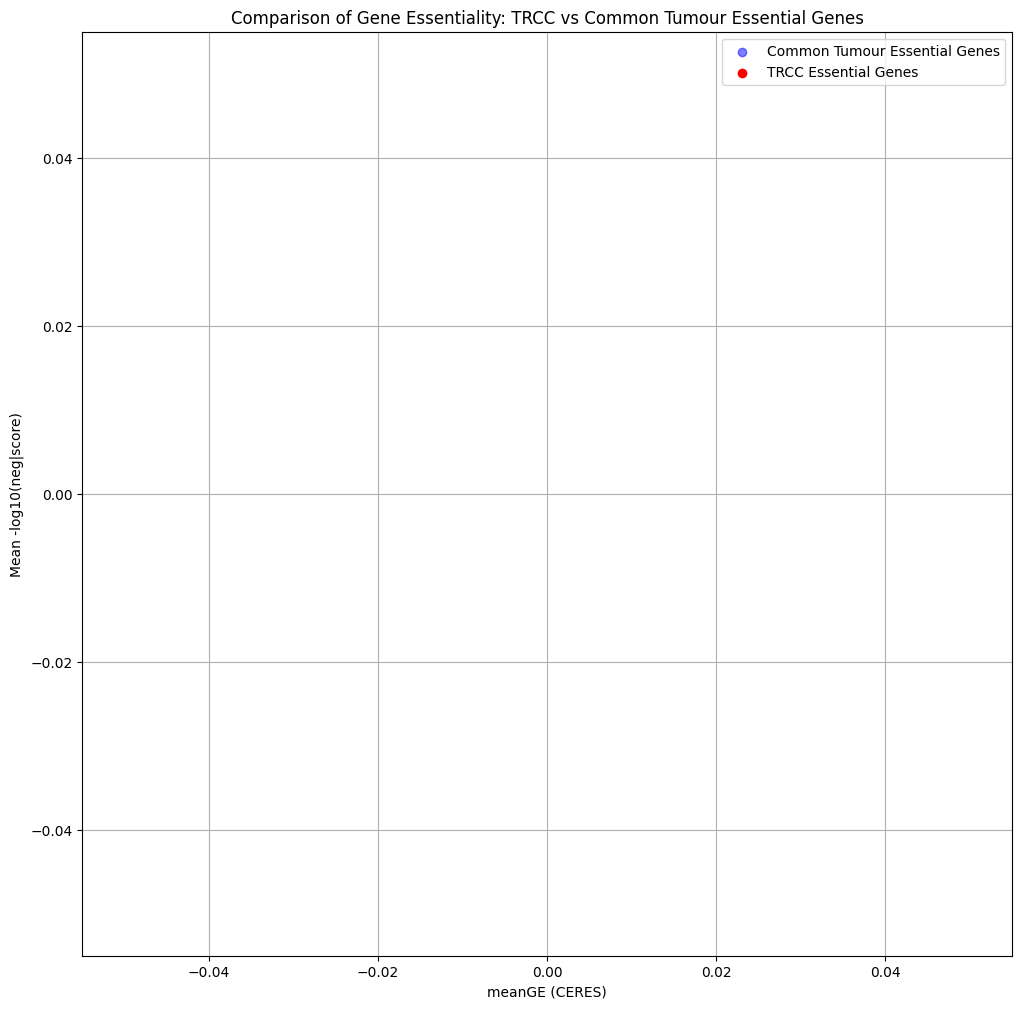

In [22]:
plt.figure(figsize=(12, 12))

plt.scatter(merged_df['meanGE'][:1000], merged_df['mean_neg_score'][:1000], color='blue', label='Common Tumour Essential Genes', alpha=0.5)

selected_genes_df = merged_df.loc[top_specific_genes]
plt.scatter(selected_genes_df['meanGE'], selected_genes_df['mean_neg_score'], color='red', label='TRCC Essential Genes')

texts = []  # Create an array to store the annotations

for gene, row in selected_genes_df.iterrows():
    annotation = plt.annotate(
        gene,
        (row['meanGE'], row['mean_neg_score']),
        fontsize=11,
        # xytext=(10, 10),  # Offset the text from the data point
        # textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            color='black',
            lw=0.5,
            connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
            alpha=0.5,  # Adjust transparency
        )
    )
    texts.append(annotation)  # Append the annotation to the array

# Use adjust_text to avoid overlapping annotations
adjust_text(texts)

plt.xlabel('meanGE (CERES)')
plt.ylabel('Mean -log10(neg|score)')
plt.title('Comparison of Gene Essentiality: TRCC vs Common Tumour Essential Genes')
plt.legend()
plt.grid(True)

min_value = merged_df['meanGE'].min()
plt.xlim(min_value - 0.1 * abs(min_value), 0)

plt.tight_layout()
plt.show()




In [ ]:
neg_TRCC = pd.concat([
    FUUR1.sort_values("neg|score")["neg|score"], 
    STFE.sort_values("neg|score")["neg|score"], 
    UOK109.sort_values("neg|score")["neg|score"], 
    UOK146.sort_values("neg|score")["neg|score"]
    ], axis=1)

neg_TRCC.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']

all_cell_lines = neg_TRCC.merge(avanaGE, left_index=True, right_index=True, how='inner')

def standardize_series(s):
    return (s - s.mean()) / s.std()

standardized_df = all_cell_lines.apply(standardize_series, axis=0)

df = standardized_df.drop(columns=['FUUR1', 'STFE', 'UOK109', 'UOK146'])

df_essential = df.loc[top_specific_genes]
cell_line_data = standardized_df[['FUUR1', 'STFE', 'UOK109', 'UOK146']].loc[top_specific_genes]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

plt.suptitle('Comparison of Gene Essentiality Scores: TRCC (RRA lo) vs Common Tumours (CERES)', y=1.0)
plt.subplots_adjust(top=0.92)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cell_line_colors = {'FUUR1': '#9467bd', 'STFE': '#8c564b', 'UOK109': '#e377c2', 'UOK146': '#7f7f7f'}

for ax, (gene, row) in zip(axes.flatten(), df_essential.iterrows()):
    # Using boxplot from matplotlib for the distributions
    bp = ax.boxplot(row, positions=[1], patch_artist=True, vert=True) # Only one position for the box plot
    
    # Set colors for box plots and adjust outlier transparency
    for patch, color in zip(bp['boxes'], [colors[0]]):  # only one box, so use the first color
        patch.set_facecolor(color)
    for whisker in bp['whiskers']:
        whisker.set(color=colors[0], linewidth=1.2)
    for cap in bp['caps']:
        cap.set(color=colors[0], linewidth=1.2)
    for median in bp['medians']:
        median.set(color='black', linewidth=1.2)
    for flier in bp['fliers']:
        flier.set(markerfacecolor=colors[0], alpha=0.2)

    # Plotting the cell line data as dots
    x_values = [1] * len(cell_line_data.columns)  # Same X position for all points
    y_values = [cell_line_data[cell_line].loc[gene] for cell_line in cell_line_data.columns]
    for i, cell_line in enumerate(cell_line_data.columns):
        ax.scatter(x_values[i], y_values[i], color=cell_line_colors[cell_line], label=cell_line, alpha=1.0, s=50, edgecolor='black', zorder=2)  # Adjust s for dot size if needed

    # To avoid repeating legends for every subplot, we'll add the legend to just one subplot (like the first one).
    if ax == axes[0, 0]:  # First subplot
        ax.legend(loc='upper right', bbox_to_anchor=(1.075, 1))
        # ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
    
    ax.set_title(gene)
    ax.set_ylabel('Standardized Gene Score', fontsize=10, labelpad=5)
    ax.set_xticks([1])  # Only one tick for the box plot
    ax.set_xticklabels([gene], rotation=0)
    ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.5)

plt.subplots_adjust(wspace=-0.5)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

FUUR1_df = -np.log10(FUUR1[["neg|score", "neg|p-value"]])
FUUR1_df["neg|p-value"] = -np.log10(FUUR1["neg|p-value"])
FUUR1_df["neg|score"] = -np.log10(FUUR1["neg|score"])
FUUR1_df = FUUR1_df.sort_values("neg|score", ascending=False)

plt.scatter(FUUR1_df[:1000]["neg|p-value"], FUUR1_df[:1000]["neg|score"], s=1)

texts = []
for id, gene in FUUR1_df.iterrows():
    if id in top_specific_genes:
        annotation = plt.annotate(
            id,
            (gene["neg|p-value"], gene["neg|score"]),
            fontsize=8,
            #  xytext=(-0.25, 0.1),
            textcoords='offset points',
            arrowprops=dict(
            arrowstyle="->",
            color='black',
            lw=0.5,
            connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
            alpha=0.5,  # Adjust transparency
        )
        )
        texts.append(annotation)

# Use adjust_text to avoid overlapping annotations
adjust_text(texts)

plt.xlabel("-10log(p-value)")
plt.ylabel("Neg Selection Score (RRA lo)")
plt.title("FUUR1 Negative Selection Ranking")
plt.show()

In [ ]:
cell_lines = [FUUR1, STFE, UOK109, UOK146]
cell_line_names = ['FUUR1', 'STFE', 'UOK109', 'UOK146']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, (cell_line_df, cell_line_name) in enumerate(zip(cell_lines, cell_line_names)):
    ax = axes[i // 2, i % 2]

    cell_line_data = -np.log10(cell_line_df[["neg|score", "neg|p-value"]])
    cell_line_data["neg|p-value"] = -np.log10(cell_line_df["neg|p-value"])
    cell_line_data["neg|score"] = -np.log10(cell_line_df["neg|score"])
    cell_line_data = cell_line_data.sort_values("neg|score", ascending=False)

    ax.scatter(
        cell_line_data[:1000]["neg|p-value"],
        cell_line_data[:1000]["neg|score"],
        s=1
    )

    texts = []
    for gene, row in cell_line_data.iterrows():
        if gene in top_specific_genes:
            annotation = ax.annotate(
                gene,
                (row["neg|p-value"], row["neg|score"]),
                fontsize=8,
                # xytext=(0.5, 0.5),
                # textcoords='offset points',
                arrowprops=dict(
                    arrowstyle="->",
                    color='black',
                    lw=0.5,
                    mutation_scale=1,
                    connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
                    alpha=0.5,  # Adjust transparency
                )
            )
            texts.append(annotation)

    # Use adjust_text to avoid overlapping annotations
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.5))

    ax.set_xlabel("-10log(p-value)")
    ax.set_ylabel("Neg Selection Score (RRA lo)")
    ax.set_title(f"{cell_line_name} Negative Selection Ranking")

plt.tight_layout()
plt.show()


In [ ]:
plt.scatter(negSortedUOK109[:2000]["neg|p-value"], -np.log10(negSortedUOK109[:2000]["neg|score"]), s=1)
plt.xlabel('Score P-value')
plt.ylabel("RRA Neg Score")
plt.title("UOK109 Negative Selection Ranking")
plt.show()

In [ ]:
plt.scatter(negSortedUOK146[:2000]["neg|p-value"], -np.log10(negSortedUOK146[:2000]["neg|score"]), s=1)
plt.xlabel('Score P-value')
plt.ylabel("RRA Neg Score")
plt.title("UOK146 Negative Selection Ranking")
plt.show()

In [ ]:
'''DepMap UOK101 Top 10 Preferentially Essential Genes'''

depmapGenes = ["SCD",
               "HNF1B",
               "KIF18B",
               "SCAP",
               "ANKFY1",
               "ERCC2",
               "DBF4",
               "ZFP36L1",
               "SLC15A3",
               "UBE2L3"]

geneResultsFUUR1 = []
for gene in depmapGenes:
    result = np.array(FUUR1[FUUR1["id"].isin([gene])])
    geneResultsFUUR1.append(result[0])

FUUR1Df = pd.DataFrame(geneResultsFUUR1, columns=FUUR1.columns)

geneResultsSTFE = []
for gene in depmapGenes:
    result = np.array(STFE[STFE["id"].isin([gene])])
    geneResultsSTFE.append(result[0])

STFEDf = pd.DataFrame(geneResultsSTFE, columns=STFE.columns)

geneResultsUOK109 = []
for gene in depmapGenes:
    result = np.array(UOK109[UOK109["id"].isin([gene])])
    geneResultsUOK109.append(result[0])

UOK109Df = pd.DataFrame(geneResultsUOK109, columns=UOK109.columns)

geneResultsUOK146 = []
for gene in depmapGenes:
    result = np.array(UOK146[UOK146["id"].isin([gene])])
    geneResultsUOK146.append(result[0])

UOK146Df = pd.DataFrame(geneResultsUOK146, columns=UOK146.columns)

FUUR1Df
STFEDf
UOK109Df
#UOK146Df